In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [7]:
# Step 2: Load dataset
# Load dataset
df = pd.read_csv("card_transdata.csv")

# Use a small sample (fast, avoids memory crash)
df_sample = df.sample(n=5000, random_state=42)

# Separate features
X = df_sample.drop(columns=['fraud'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

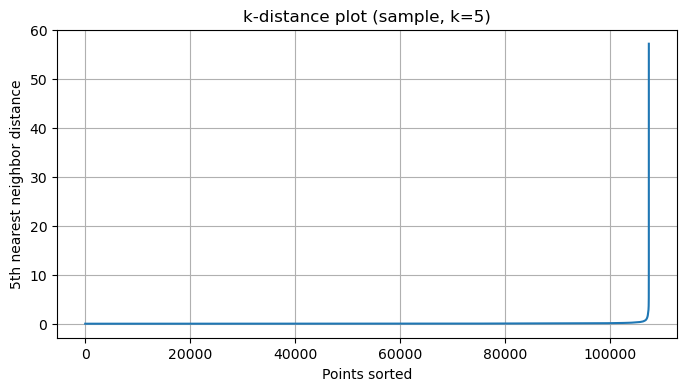

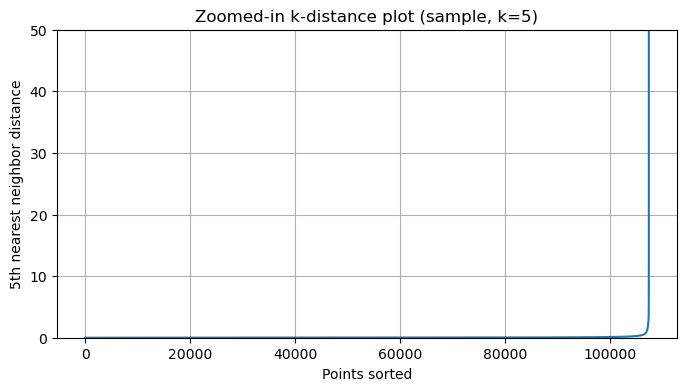

In [5]:
# Step 4: k-distance plot on the sampled dataset
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_s_scaled)
distances, _ = nbrs.kneighbors(X_s_scaled)

k_dists = np.sort(distances[:, -1])

plt.figure(figsize=(8,4))
plt.plot(k_dists)
plt.title("k-distance plot (sample, k=5)")
plt.xlabel("Points sorted")
plt.ylabel("5th nearest neighbor distance")
plt.grid(True)
plt.show()

# Zoom in to see detail
plt.figure(figsize=(8,4))
plt.plot(k_dists)
plt.ylim(0, 50)
plt.title("Zoomed-in k-distance plot (sample, k=5)")
plt.xlabel("Points sorted")
plt.ylabel("5th nearest neighbor distance")
plt.grid(True)
plt.show()


# DBSCAN

In [8]:
# Step 5 — DBSCAN on the sampled data
dbscan = DBSCAN(eps=2.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = np.sum(labels_db == -1)

print("DBSCAN → clusters:", n_clusters, " | noise points:", n_noise)


DBSCAN → clusters: 4  | noise points: 26


# K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)

print("K-Means → inertia:", kmeans.inertia_, 
      " | silhouette:", silhouette_score(X_scaled, labels_km))


K-Means → inertia: 25355.918662636206  | silhouette: 0.39381697361799844


# Agglomerative

In [10]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_agg = agg.fit_predict(X_scaled)

print("Agglomerative → silhouette:", silhouette_score(X_scaled, labels_agg))


Agglomerative → silhouette: 0.8760532661772068
